# Import Library

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump

# Memanggil dataset

In [33]:
df = pd.read_csv("datasetmobil.csv")

# Deskripsi dataset

In [34]:
#Pisahkan fitur dan target
X = df.drop(columns="harga")
y = df["harga"]

# Tampilkan hasil pemisahan
print("=== Fitur (X) ===")
print(X.head())

print("\n=== Target (y) ===")
print(y.head())

=== Fitur (X) ===
  model  tahun transmisi  kilometer bahan_bakar    pajak   mpg   cc
0  Agya   2010    manual     160381      bensin  1800000  38.5  1.0
1  Agya   2010     matic     201098      bensin  1800001  38.5  1.0
2  Agya   2010    manual     211092      bensin  1800002  38.5  1.0
3  Agya   2010     matic     175011      bensin  1800003  38.5  1.0
4  Agya   2011    manual     190122      bensin  2000000  39.6  1.0

=== Target (y) ===
0    76000000
1    78000000
2    70000000
3    80000000
4    78000000
Name: harga, dtype: int64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model        409 non-null    object 
 1   tahun        409 non-null    int64  
 2   harga        409 non-null    int64  
 3   transmisi    409 non-null    object 
 4   kilometer    409 non-null    int64  
 5   bahan_bakar  409 non-null    object 
 6   pajak        409 non-null    int64  
 7   mpg          409 non-null    float64
 8   cc           409 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 28.9+ KB


In [36]:
df.describe

<bound method NDFrame.describe of              model  tahun      harga transmisi  kilometer bahan_bakar  \
0             Agya   2010   76000000    manual     160381      bensin   
1             Agya   2010   78000000     matic     201098      bensin   
2             Agya   2010   70000000    manual     211092      bensin   
3             Agya   2010   80000000     matic     175011      bensin   
4             Agya   2011   78000000    manual     190122      bensin   
..             ...    ...        ...       ...        ...         ...   
404  Corolla Cross   2022  700302100     matic       1002      hybrid   
405  Corolla Cross   2022  702300101     matic       2100      hybrid   
406  Corolla Cross   2023  703101200     matic       4923      hybrid   
407  Corolla Cross   2023  760300000     matic       2301          ev   
408  Corolla Cross   2023  770300000     matic       1003          ev   

       pajak   mpg   cc  
0    1800000  38.5  1.0  
1    1800001  38.5  1.0  
2    180000

# Definisikan kolom kategorikal dan numerikal

In [37]:
categorical_cols = ["model", "transmisi", "bahan_bakar"]
numerical_cols = ["tahun", "kilometer", "pajak", "mpg", "cc"]

# Tampilkan hasil identifikasi
print("=== Kolom Kategorikal ===")
print(categorical_cols)

print("\n=== Kolom Numerikal ===")
print(numerical_cols)

=== Kolom Kategorikal ===
['model', 'transmisi', 'bahan_bakar']

=== Kolom Numerikal ===
['tahun', 'kilometer', 'pajak', 'mpg', 'cc']


# Correlation Matrix

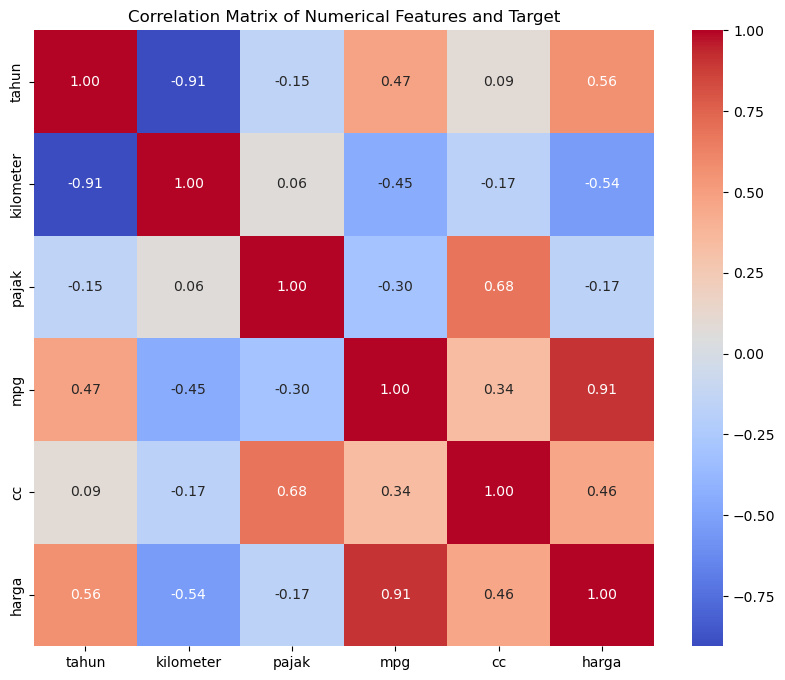

In [38]:
# Select only the numerical columns and the target column
df_numerical_target = df[numerical_cols + ["harga"]]

# Calculate the correlation matrix
correlation_matrix = df_numerical_target.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features and Target")
plt.show()

# Preprocessing

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)

# Fit dan transformasikan data (contoh menggunakan sebagian data untuk tampilan)
X_transformed = preprocessor.fit_transform(X)

# Untuk melihat hasil transformasi, kita ubah ke DataFrame
# Ambil nama fitur hasil one-hot encoding
encoded_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols)

# Gabungkan dengan nama kolom numerik
all_feature_names = list(encoded_feature_names) + numerical_cols

# Buat DataFrame dari hasil transformasi
import pandas as pd
X_transformed_df = pd.DataFrame(X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed,
                                columns=all_feature_names)

# Tampilkan hasil preprocessing
print("=== Data Setelah Preprocessing ===")
print(X_transformed_df.head())

=== Data Setelah Preprocessing ===
   model_Agya  model_Avanza Veloz  model_Calya  model_Corolla Cross  \
0         1.0                 0.0          0.0                  0.0   
1         1.0                 0.0          0.0                  0.0   
2         1.0                 0.0          0.0                  0.0   
3         1.0                 0.0          0.0                  0.0   
4         1.0                 0.0          0.0                  0.0   

   model_Fortuner  model_Innova  model_Raize  model_Rush  transmisi_manual  \
0             0.0           0.0          0.0         0.0               1.0   
1             0.0           0.0          0.0         0.0               0.0   
2             0.0           0.0          0.0         0.0               1.0   
3             0.0           0.0          0.0         0.0               0.0   
4             0.0           0.0          0.0         0.0               1.0   

   transmisi_matic  bahan_bakar_bensin  bahan_bakar_diesel  bahan_bak

# Pipeline regresi dengan RandomForest

In [40]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Tampilkan isi pipeline
print("=== Struktur Pipeline ===")
for name, step in pipeline.steps:
    print(f"- {name}: {type(step).__name__}")

=== Struktur Pipeline ===
- preprocessor: ColumnTransformer
- regressor: RandomForestRegressor


# Split data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran data train dan test
print("=== Ukuran Data Setelah Split ===")
print(f"X_train: {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test : {y_test.shape}")

=== Ukuran Data Setelah Split ===
X_train: (327, 8)
X_test : (82, 8)
y_train: (327,)
y_test : (82,)


# Latih model

In [42]:
pipeline.fit(X_train, y_train)

d:\Anaconda.com\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model', 'transmisi',
                                                   'bahan_bakar'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Evaluasi model

In [43]:
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # dikalikan 100 agar dalam persentase

# Tampilkan hasil evaluasi
print("=== Evaluasi Model ===")
print(f"Mean Squared Error (MSE)               : {mse:,.2f}")
print(f"R-squared (R²)                         : {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) : {mape:.2f}%")

=== Evaluasi Model ===
Mean Squared Error (MSE)               : 57,235,814,369,178.48
R-squared (R²)                         : 0.9969
Mean Absolute Percentage Error (MAPE) : 2.79%


In [44]:
input_data = pd.DataFrame([{
    'model': 'Cayla',
    'tahun': 2021,
    'transmisi': 'manual',
    'kilometer': 165188200,
    'bahan_bakar': 'bensin',
    'pajak': 2500012,
    'mpg': 40.3,
    'cc': 1.5
}])

prediction = pipeline.predict(input_data)[0]
print(f"\nHarga mobil (dalam Rupiah): Rp{prediction:,.0f}")


Harga mobil (dalam Rupiah): Rp137,304,612


In [45]:
prediction = pipeline.predict(input_data)[0]
print(f"\nEstimasi harga mobil (dalam Rupiah): Rp{prediction:,.0f}")


Estimasi harga mobil (dalam Rupiah): Rp137,304,612


# Save model

In [46]:
dump(pipeline, 'harga_mobil.joblib')
print("\nModel berhasil disimpan sebagai 'harga_mobil.joblib'")



Model berhasil disimpan sebagai 'harga_mobil.joblib'
